Exploratory data analysis of the *SETI* dataset:
- we will analyse the imbalance of the classes,
- then we will show an image for each class,
- finally we will only keep the on-target observations.

Note:

We will not analyse the image ratio, as the dataset only includes 273x256 images.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use the csv file for the imbalance analysis

In [2]:
df = pd.read_csv('../input/seti-breakthrough-listen/train_labels.csv')

print("df shape: {}\n".format(df.shape))

df.head()

df shape: (50165, 2)



,id,target
0,00034abb3629,0
1,0004300a0b9b,0
2,000453852fda,0
3,00047dfc96a9,0
4,0004be0baf70,0


In [3]:
df.target.value_counts()

0    45471
1     4694
Name: target, dtype: int64

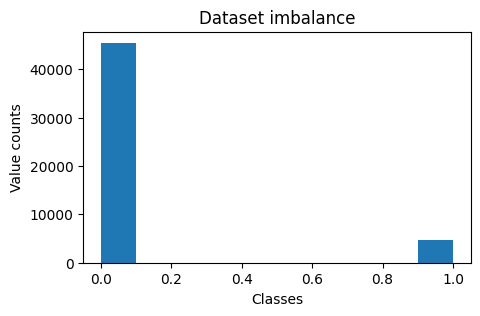

In [8]:
plt.style.use(['default'])
plt.figure(figsize=(5, 3))
plt.hist(df.target)
plt.xlabel("Classes")
plt.ylabel("Value counts")
plt.title("Dataset imbalance")
plt.show()

We have to deal with a **binary classification** problem with an **imbalance** between its two classes.

This will impact the tools we will need for this problem:
- specific weights for each class,
- the loss -> [Sigmoid Focal CrossEntropy](https://www.tensorflow.org/addons/api_docs/python/tfa/losses/SigmoidFocalCrossEntropy).

# Image visualization

In [9]:
def show_SETI_image(img_array, title_pos=7.25, ylabel_pos=3.5):
    
    dim = min(img_array.shape)
    
    plt.style.use(['default'])
    
    fig, axes = plt.subplots(dim, 1)

    for index, axis in enumerate(axes):
        axis.imshow(img_array[index].astype(float), aspect='auto')
    
    plt.title("Spectrogram", y=title_pos)
    plt.xlabel('Frequency')
    plt.ylabel('Time for each channel', y=ylabel_pos)
    
    plt.show()

Image shape: (6, 273, 256)



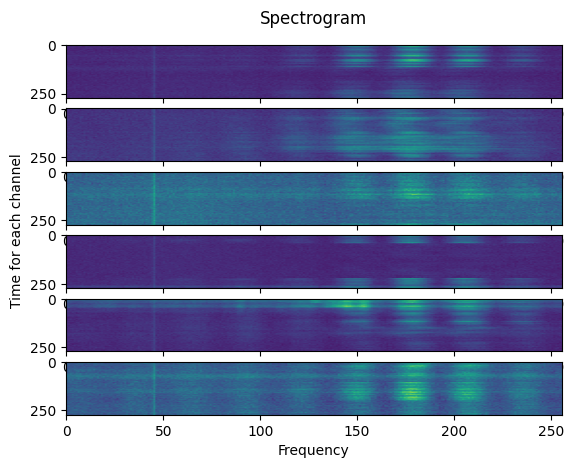

In [10]:
# Image of the class 0:

img_arr = np.load("../input/seti-breakthrough-listen/train/2/20022855793c.npy")
print("Image shape: {}\n".format(img_arr.shape))

show_SETI_image(img_arr)

Image shape: (6, 273, 256)



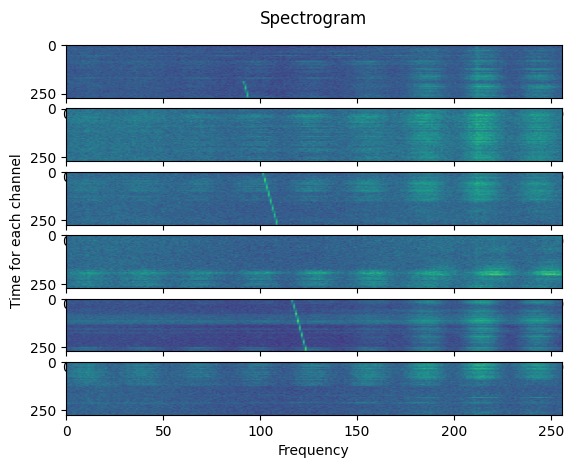

In [11]:
# Image of the class 1:

img_arr_true = np.load("../input/seti-breakthrough-listen/train/2/2fd2f4848778.npy")
print("Image shape: {}\n".format(img_arr_true.shape))

show_SETI_image(img_arr_true)

We will only keep the **on-target** observations, i.e. the **first**, **third** and **fifth** parts of an image.

In [12]:
def on_target(img_arr):
        
    new_img = np.dstack((img_arr[0], img_arr[2], img_arr[4]))
    
    new_img = np.moveaxis(new_img, -1, 0)

    return new_img

Image shape: (3, 273, 256)



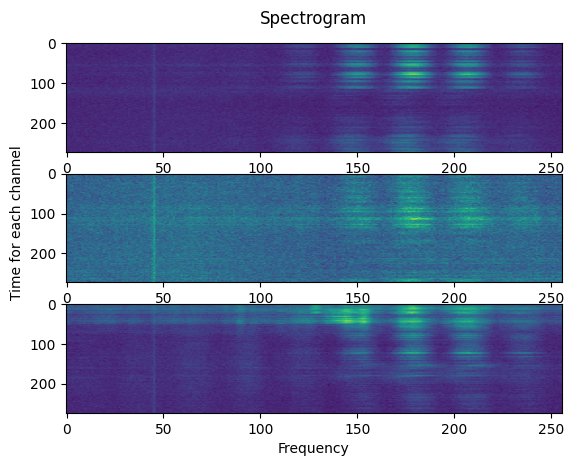

In [14]:
# Image of the class 0:

print("Image shape: {}\n".format(on_target(img_arr).shape))

show_SETI_image(on_target(img_arr), title_pos=3.5, ylabel_pos=1.75)

Image shape: (3, 273, 256)



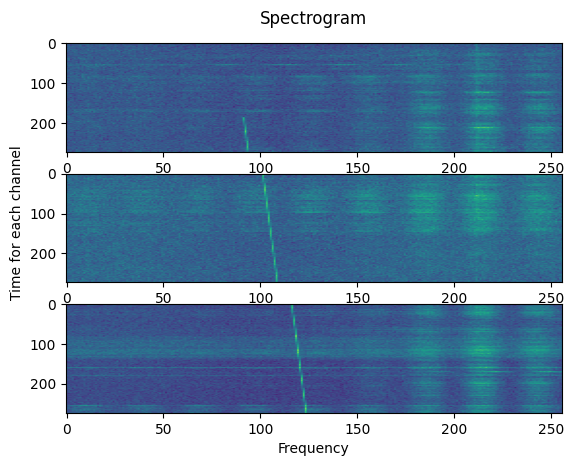

In [15]:
# Image of the class 1:

print("Image shape: {}\n".format(on_target(img_arr_true).shape))

show_SETI_image(on_target(img_arr_true), title_pos=3.5, ylabel_pos=1.75)

For the next kernel, we will not use the np.moveaxis() function because of the Keras models.

Indeed, these models need images with this kind of shape: (img_width, img_height, number of channels).

This means that the information on the number of channels must be the last element of this image shape.

N.B. :
In fact, the data will need a fourth dimension in order to consider the batch size.